# Credit EDA Assignment 

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

## Import Libraries

In [39]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings('ignore')

## Loading the Application Data

In [40]:
#reading the application dataset and check the first five rows
df = pd.read_csv("application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [41]:
#Check the shape of the dataframe
df.shape

(307511, 122)

In [42]:
#Check the datatypes of columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [43]:
#check the summary of the dataframe
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Data Cleaning

### 1. Missing Value Treatment

In [44]:
#check the percentage of missing values in each column
null_per = round((df.isnull().sum()*100)/len(df),2).sort_values(ascending = False)
null_per

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [45]:
#Columns with null values more than 40% 
n_p = null_per[null_per.values > 40]
len(n_p)

49

In [46]:
#drop columns with null values more than 40%
def remove_columns(df, percent = 0.40):
    col = df.isnull().sum()*100/len(df)
    col = list(col[col.values > 40].index)
    df.drop(col, axis = 1,inplace = True)
    print("Shape of new DataFrame:", df.shape)
    return df 

In [47]:
df_new = remove_columns(df, 0.40)

Shape of new DataFrame: (307511, 73)


In [48]:
#Removing Unwanted columns from DataFrame

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
          'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
          'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 
          'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','OBS_30_CNT_SOCIAL_CIRCLE', 
          'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE']

df_new.drop(unwanted, axis = 1, inplace = True)

In [49]:
#checking the null values in new df
df_new.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
R

In [50]:
# impute the missing value in occupation_type column with its mode
df_new.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [51]:
df_new['OCCUPATION_TYPE'] = df_new['OCCUPATION_TYPE'].fillna(df_new['OCCUPATION_TYPE'].mode()[0])

In [52]:
df_new.OCCUPATION_TYPE.value_counts()

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64

In [53]:
# Replacing XNA(not available) with mode in CODE_GENDER column
df_new.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [54]:
df_new.loc[df_new['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'
df_new.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [55]:
#Replacing XNA(not available) with null values in ORGANIZATION_TYPE column
df_new.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [56]:
df_new.ORGANIZATION_TYPE = df_new.ORGANIZATION_TYPE.replace('XNA', np.NaN)

In [57]:
#check if any XNA present in DataFrame
(df_new.values == 'XNA').sum()

0

Impute missing value of the columns AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, 
AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR
with its mode

In [62]:
df_new.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [63]:
df_new['AMT_REQ_CREDIT_BUREAU_HOUR'] = df_new['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_new['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])


In [64]:
df_new.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [65]:
df_new['AMT_REQ_CREDIT_BUREAU_DAY'] = df_new['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_new['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])


In [66]:
df_new.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [67]:
df_new['AMT_REQ_CREDIT_BUREAU_WEEK'] = df_new['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_new['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])


In [68]:
df_new.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [69]:
df_new['AMT_REQ_CREDIT_BUREAU_MON'] = df_new['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_new['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])


In [70]:
df_new.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [71]:
df_new['AMT_REQ_CREDIT_BUREAU_QRT'] = df_new['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df_new['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])


In [72]:
df_new.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

In [73]:
df_new['AMT_REQ_CREDIT_BUREAU_YEAR'] = df_new['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_new['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])


In [74]:
df_new.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
R

### 2. Treatment of Errors in Data

In [ ]:
#columns which start with days
days_col = [col for col in df_new if col.startswith('DAYS')]
print(days_col)

In [ ]:
#unique values present in days_col
for c in days_col:
    print(df_new[c].unique())

In [ ]:
#impute the absolute values for the above columns
df_new[days_col] = abs(df_new[days_col])

In [ ]:
for c in days_col:
    print(df_new[c].unique())

### 3. Finding Outliers

In [77]:
# checking the distribution of a subset of continuous variables
round(df_new[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH']].describe(),3)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH
count,3.075110e+05,307511.000,307499.000,307233.000,307511.000
mean,1.687979e+05,599026.000,27108.574,538396.207,16036.995
std,2.371231e+05,402490.777,14493.737,369446.461,4363.989
min,2.565000e+04,45000.000,1615.500,40500.000,7489.000
25%,1.125000e+05,270000.000,16524.000,238500.000,12413.000
50%,1.471500e+05,513531.000,24903.000,450000.000,15750.000
75%,2.025000e+05,808650.000,34596.000,679500.000,19682.000
max,1.170000e+08,4050000.000,258025.500,4050000.000,25229.000


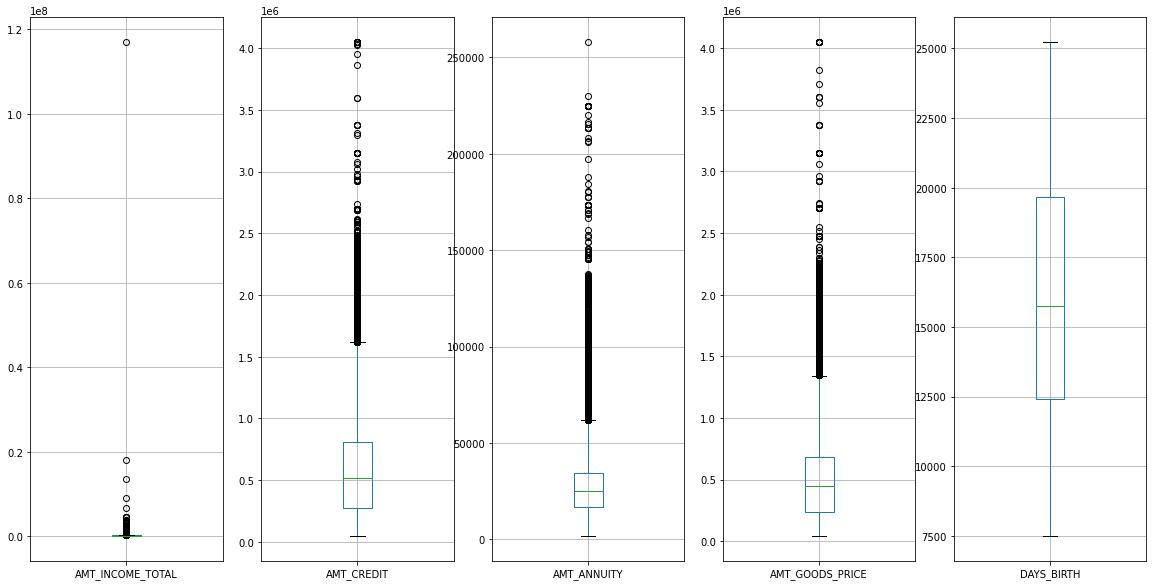

In [78]:
col = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH']
plt.figure(figsize = (20,10))
for i, col in enumerate(col):
    plt.subplot(1,5, i+1)
    df_new.boxplot(column = col)
plt.show()

AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE variables have huge number of outliers.

In [81]:
#Converting DAYS_BIRTH to year
df_new['DAYS_BIRTH'] = abs(df_new['DAYS_BIRTH']//365)

## Binning of Continuous Variable( AMT_INCOME_TOTAL, AMT_CREDIT, DAYS_BIRTH)

In [83]:
q25 = df_new['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = df_new['AMT_INCOME_TOTAL'].quantile(0.60)

In [84]:
#Creating Income column contining category of income
def income_cat(value):
    if value <= q25:
        return 'Low'
    elif value > q25 and value <= q60:
        return 'Medium'
    else:
        return 'High'
df_new['Income'] = df_new['AMT_INCOME_TOTAL'].apply(income_cat)

In [85]:
#Creating Age_Group column
def age_cat(value):
    if value <= 35:
        return 'Young'
    elif value > 35 and value <= 55:
        return 'Mid Age'
    else:
        return 'Old'
df_new['Age_Category'] = df_new['DAYS_BIRTH'].apply(age_cat)

In [86]:
q50 = df_new['AMT_CREDIT'].quantile(0.5)
q75 = df_new['AMT_CREDIT'].quantile(0.75)

In [87]:
#Creating Credit_Category column
def credit_cat(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'
    
df_new['Credit_Category'] = df_new['AMT_CREDIT'].apply(credit_cat)

## Checking Imbalance in the target variable column

In [91]:
Target_count = df_new['TARGET'].value_counts()
Target_count

0    282686
1     24825
Name: TARGET, dtype: int64

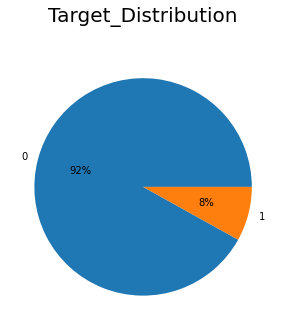

In [97]:
plt.figure(figsize = (5,5))
plt.title("Target_Distribution\n", fontdict={'fontsize': 20, 'fontweight' : 5})
Target_count.plot.pie(autopct = '%1.0f%%', ylabel = '')
plt.show()

There is a large imbalance between the both the proportion in the dataset. Almost 92% is Default(Target = 0) and 8% is Non-Default(Target = 1).

## Exploratory Data Analysis

### 1. Univariate Analysis 

In [99]:
df_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'Income',
       'Age_Category', 'Credit_Category'],
      

In [100]:
Categorical_col = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                   'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'Income',
       'Age_Category', 'Credit_Category']

Continuous_col = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

### 1.1 Contract Type


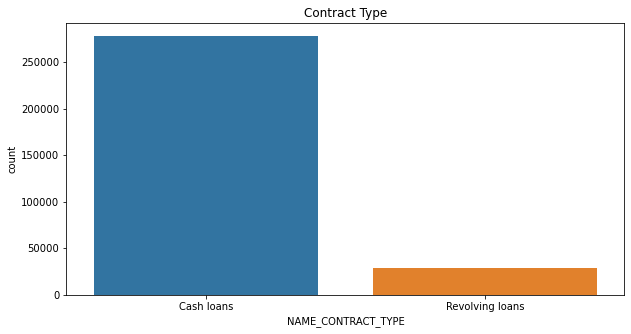

In [102]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df_new)
plt.title("Contract Type")
plt.show()

### 1.2 CODE_GENDER

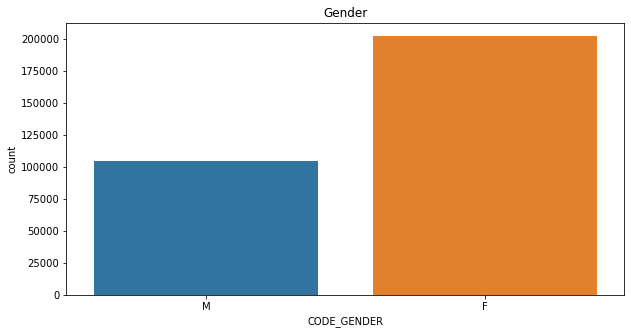

In [104]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'CODE_GENDER', data = df_new)
plt.title("Gender")
plt.show()

### 1.3 CAR OWNED

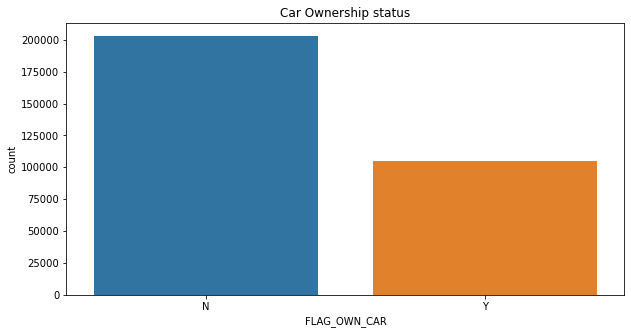

In [105]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'FLAG_OWN_CAR', data = df_new)
plt.title("Car Ownership status")
plt.show()

### 1.4 Realty Ownership Status

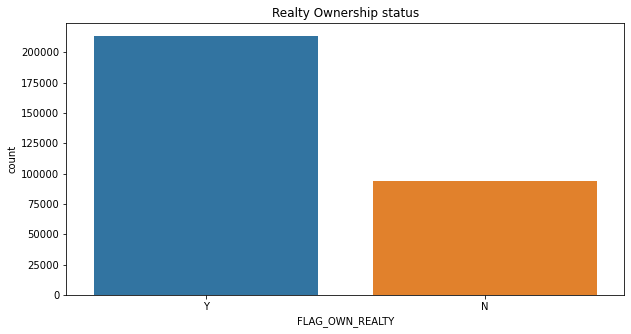

In [106]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'FLAG_OWN_REALTY', data = df_new)
plt.title("Realty Ownership status")
plt.show()

### 1.5 Income Type

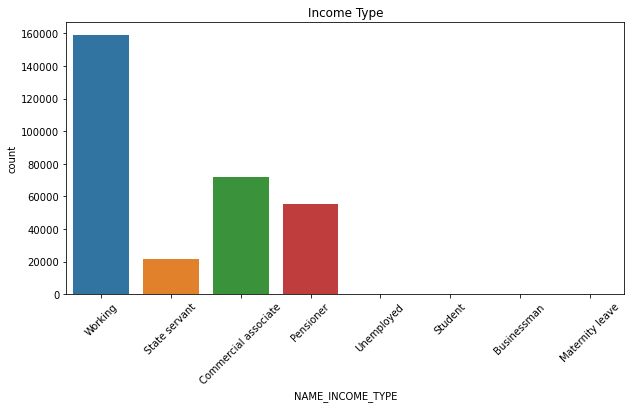

In [108]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'NAME_INCOME_TYPE', data = df_new)
plt.title("Income Type")
plt.xticks(rotation=45)

plt.show()

### 1.6 Education Type

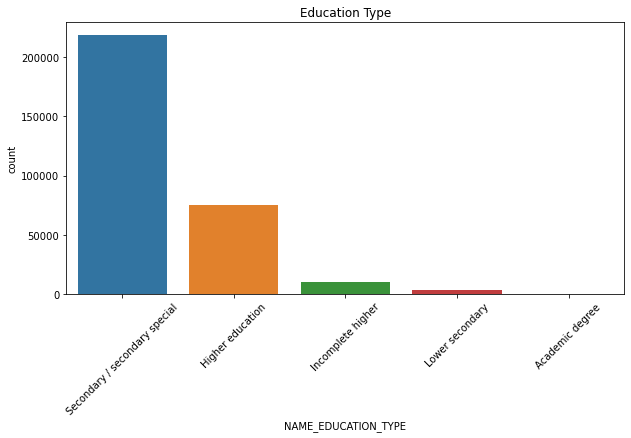

In [109]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = df_new)
plt.title("Education Type")
plt.xticks(rotation=45)

plt.show()

### 1.7 Family Status

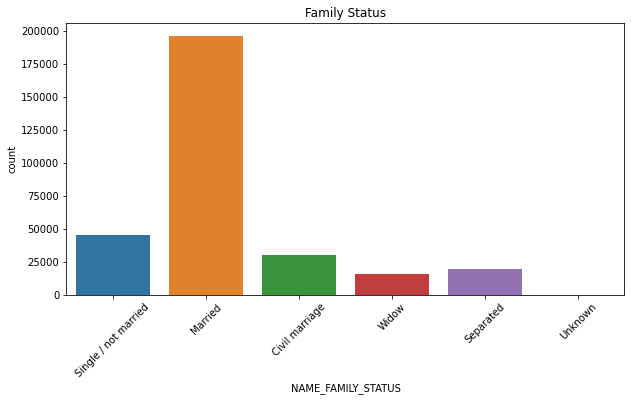

In [110]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'NAME_FAMILY_STATUS', data = df_new)
plt.title("Family Status")
plt.xticks(rotation=45)

plt.show()

### 1.8 Category of Income

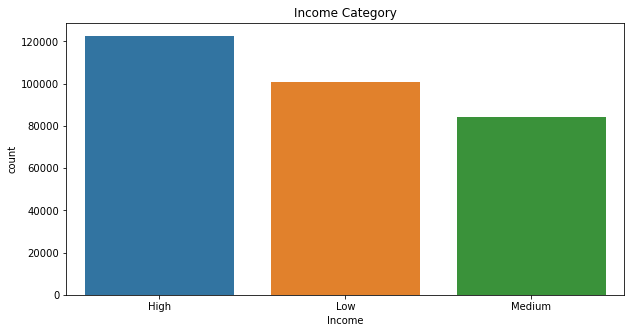

In [118]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Income', data = df_new)
plt.title("Income Category")

plt.show()

### 1.9 Category of Age

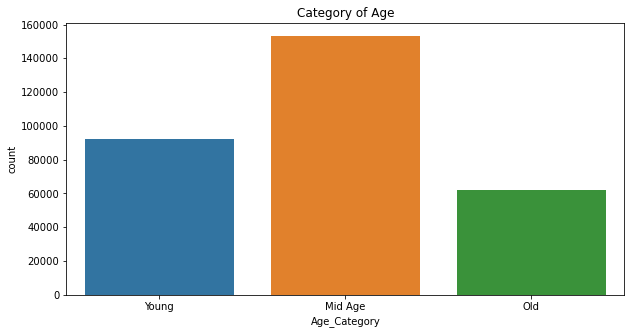

In [119]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Age_Category', data = df_new)
plt.title("Category of Age")

plt.show()

### 1.10 Credit Category

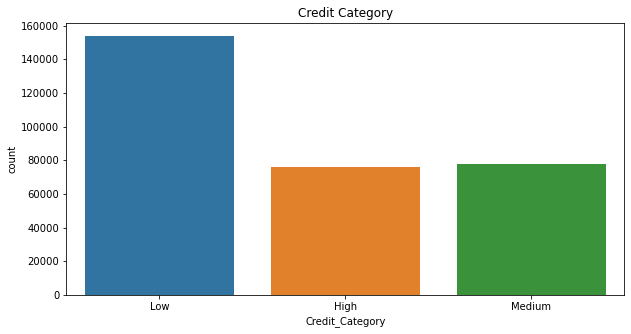

In [120]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Credit_Category', data = df_new)
plt.title("Credit Category")

plt.show()

### 1.11 Days_Birth

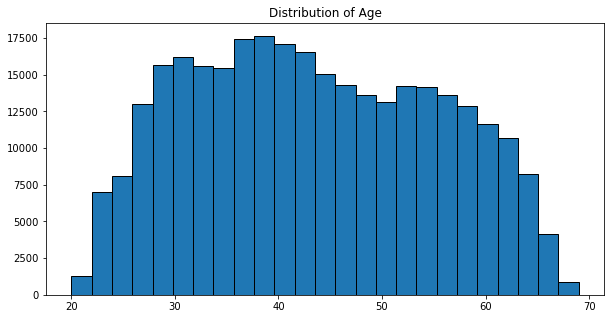

In [122]:
plt.figure(figsize = (10,5))

plt.hist(df_new['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title("Distribution of Age")
plt.show()

### 1.12  Graph for AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

In [124]:
columns = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

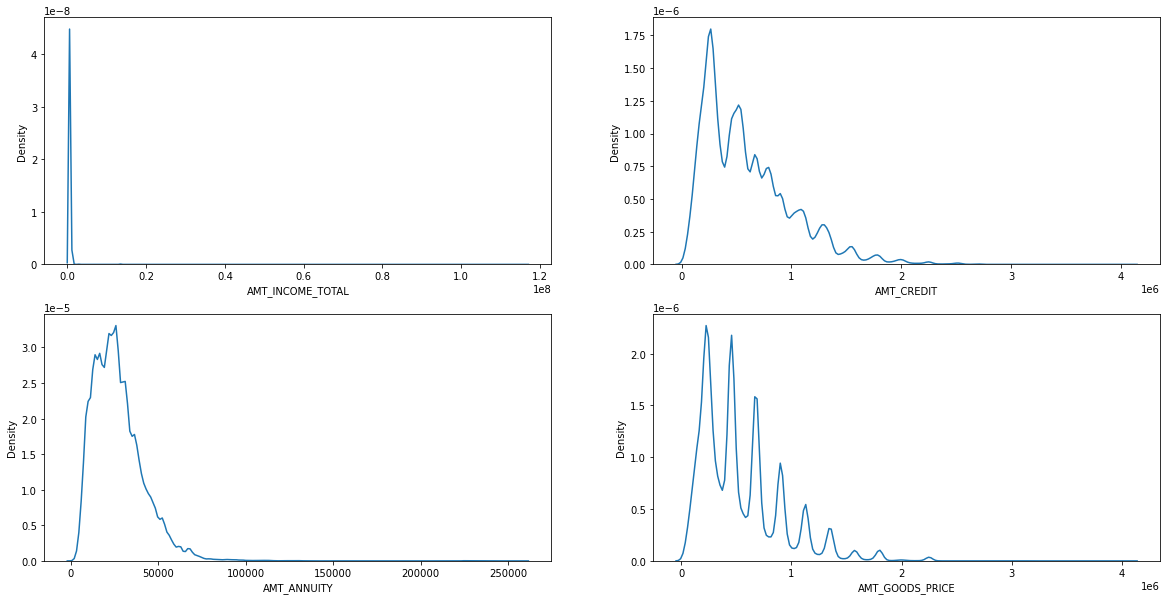

In [130]:
plt.figure(figsize = (20,10))

for i, col in enumerate(columns):
    ax = plt.subplot(2,2,i+1)
    sns.kdeplot(df_new[col])
plt.show()

### 2. Bivariate Analysis 

### 2.1 Bivariate Analysis of Continuous Variables

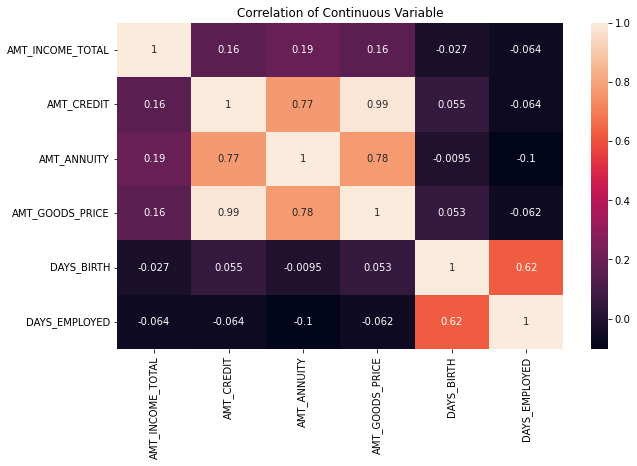

In [137]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
corr = df_new[Continuous_col].corr()
sns.heatmap(corr, annot = True)           
plt.title('Correlation of Continuous Variable')
plt.show()

### 2.2 Bivariate Analysis of Categorical Variables

In [147]:
Categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                   'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'Income',
       'Age_Category']

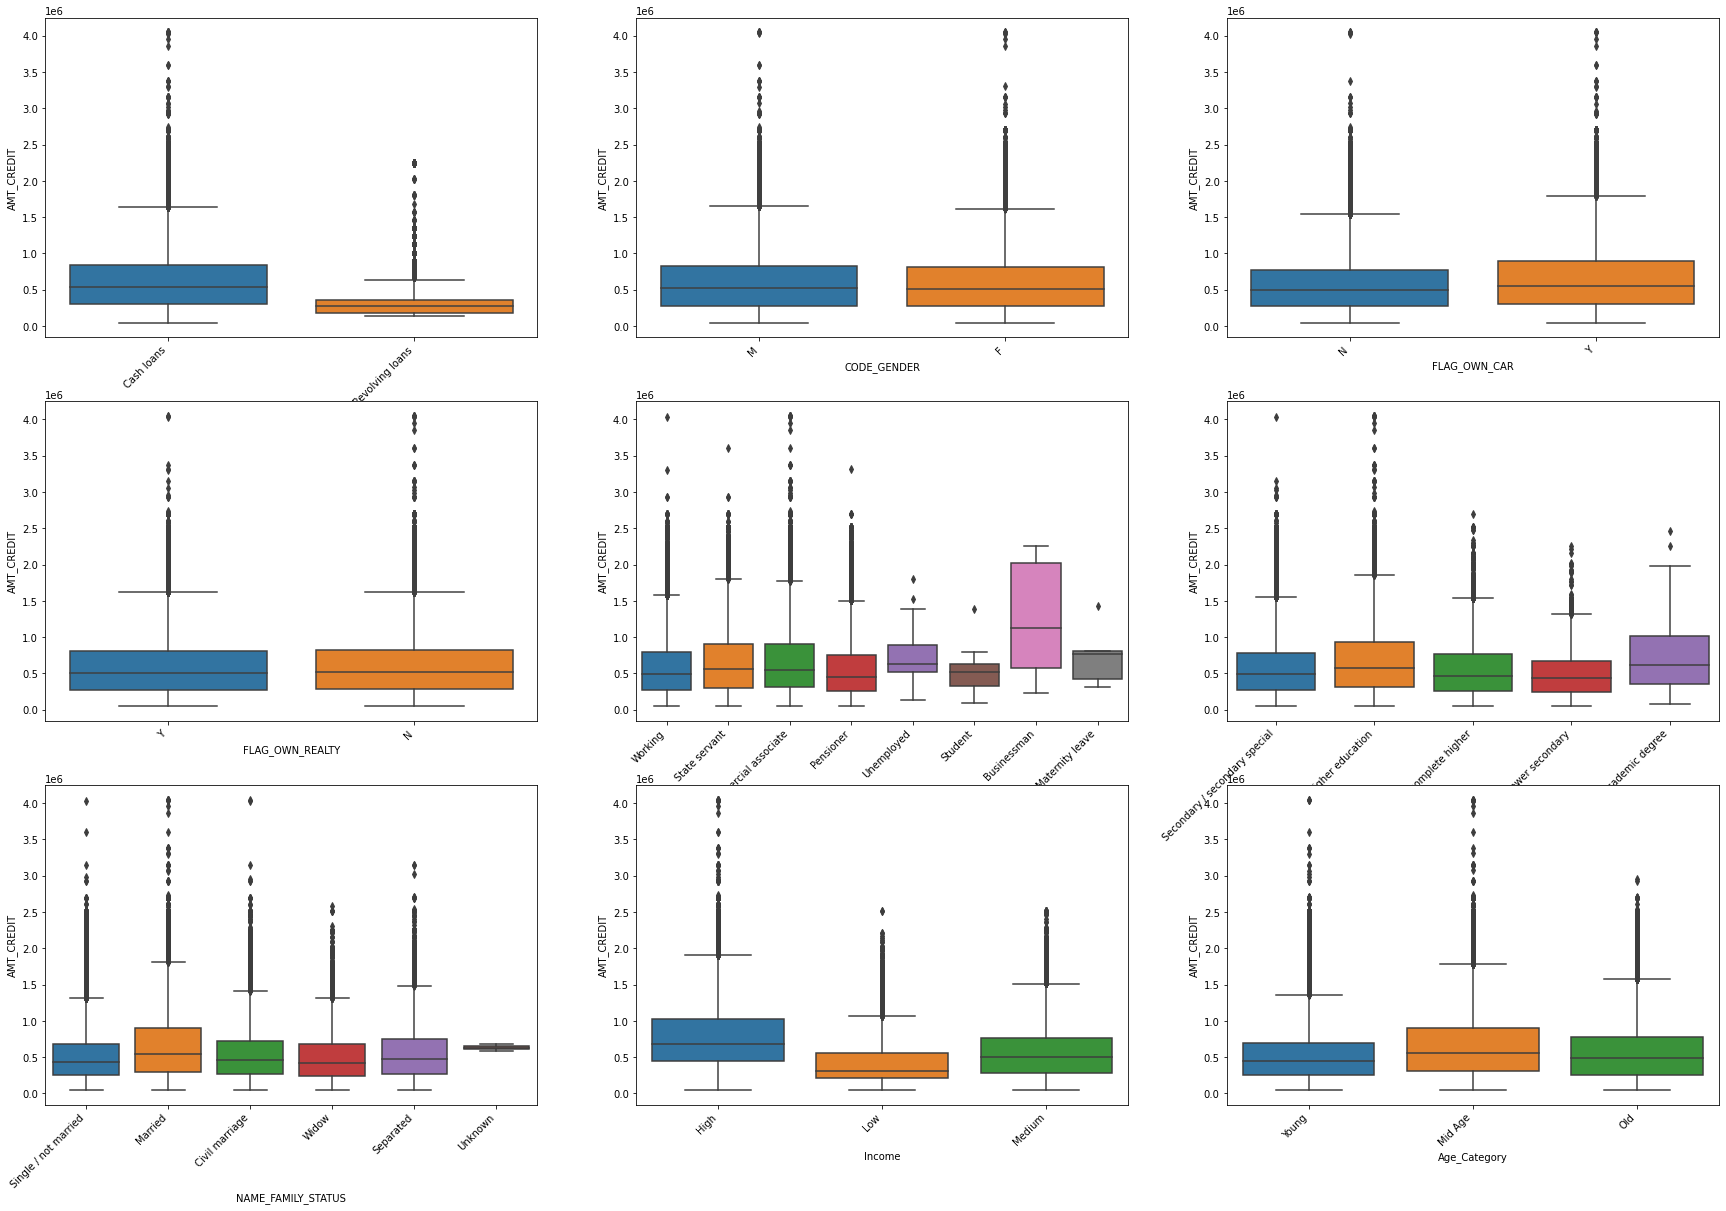

In [152]:
# plotting for Defaulters
plt.figure(figsize=(30,20))

for i, category in enumerate(Categories):
    ax = plt.subplot(3,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_new)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

### 3. Segmented Univariate Analysis 

In [153]:
# Dividing the data based on Target Variable
target_default = df_new.loc[df_new['TARGET'] == 1]
target_nondefault = df_new.loc[df_new['TARGET'] == 0]

In [154]:
target_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income,Age_Category,Credit_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,High,Young,Low
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,51,2628,6573.0,1827,Cooking staff,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,0.0,0.0,0.0,0.0,2.0,2.0,Low,Mid Age,High
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,47,1262,1182.0,1029,Laborers,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,2.0,0.0,4.0,High,Mid Age,High
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,36,3597,45.0,4409,Sales staff,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,0.0,0.0,0.0,0.0,0.0,2.0,Medium,Mid Age,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,67,365243,5391.0,4199,Laborers,THURSDAY,10,0,0,0,0,0,0,NaN,0.023952,0.720944,0.0,0.0,0.0,0.0,0.0,0.0,Low,Old,Low


In [155]:
target_nondefault.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income,Age_Category,Credit_Category
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0,High,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Low,Mid Age,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Mid Age,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,46,1588,4970.0,477,Laborers,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,1.0,1.0,Low,Mid Age,Low


### 3.1 Contract Type

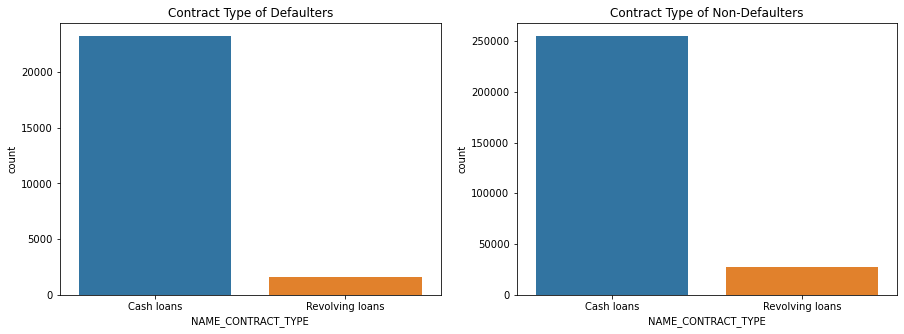

In [158]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target_default)
plt.title("Contract Type of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = target_nondefault)
plt.title("Contract Type of Non-Defaulters")
plt.show()

### 3.2 CODE_GENDER

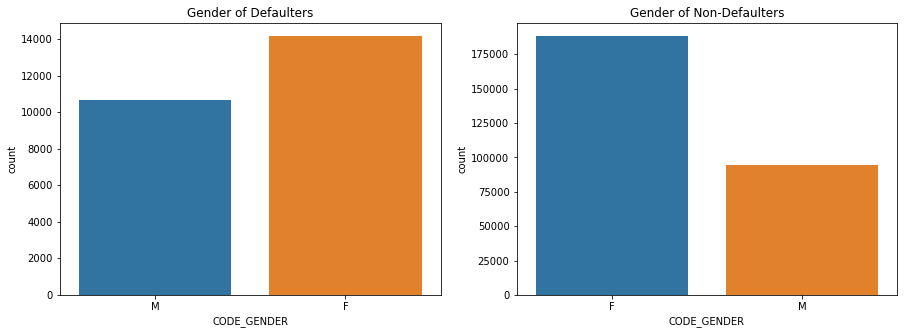

In [160]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = target_default)
plt.title("Gender of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = target_nondefault)
plt.title("Gender of Non-Defaulters")
plt.show()

### 3.3 Car Owned

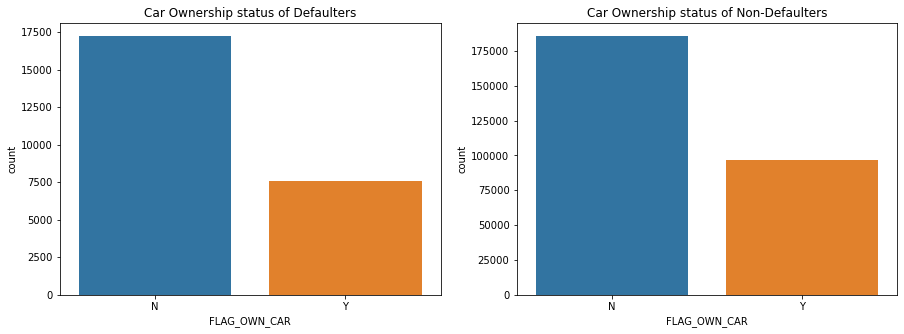

In [161]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = target_default)
plt.title("Car Ownership status of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = target_nondefault)
plt.title("Car Ownership status of Non-Defaulters")
plt.show()

### 3.4 Realty Ownership status

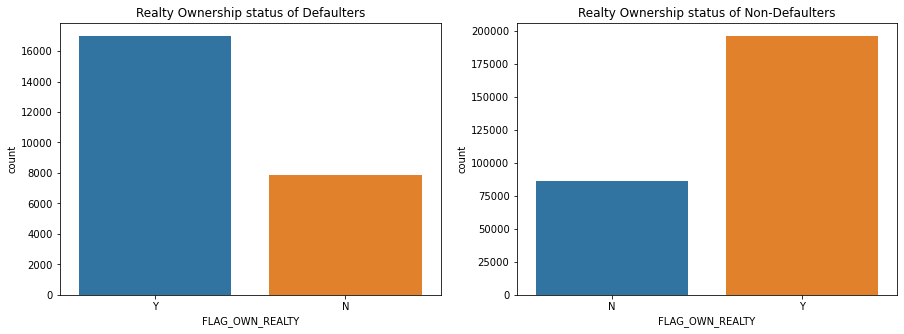

In [162]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = target_default)
plt.title("Realty Ownership status of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = target_nondefault)
plt.title("Realty Ownership status of Non-Defaulters")
plt.show()

### 3.5 Income Type

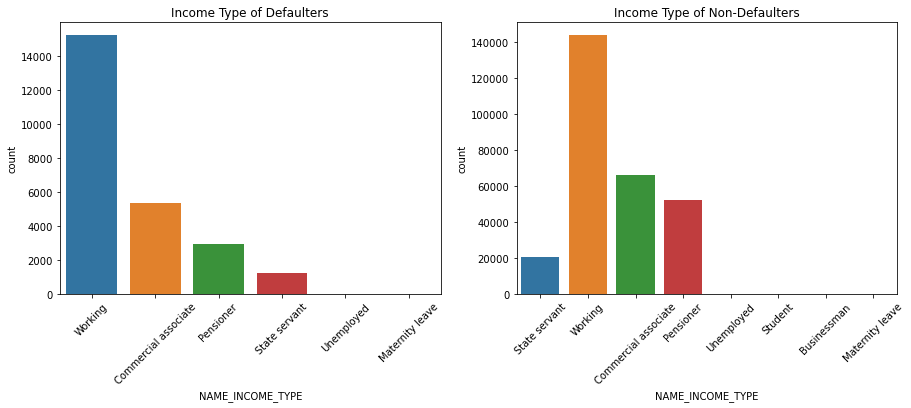

In [166]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target_default)
plt.title("Income Type of Defaulters")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = target_nondefault)
plt.title("Income Type of Non-Defaulters")
plt.xticks(rotation=45)

plt.show()

### 3.6 Education Type

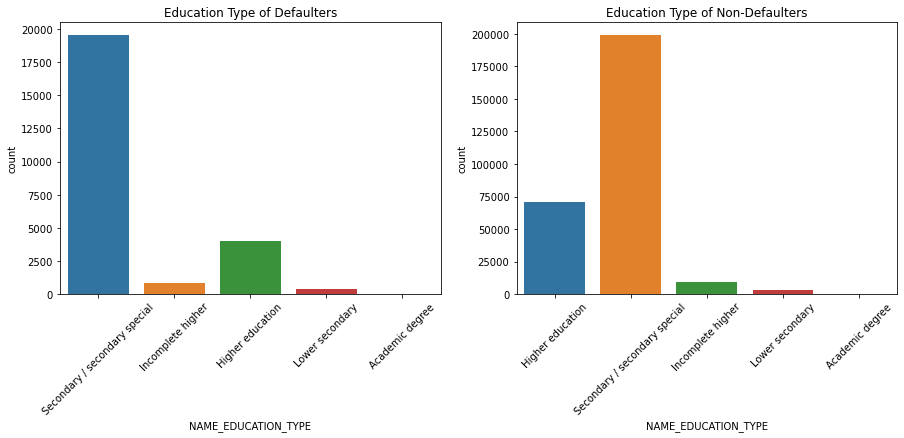

In [167]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target_default)
plt.title("Education Type of Defaulters")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = target_nondefault)
plt.title("Education Type of Non-Defaulters")
plt.xticks(rotation=45)

plt.show()

### 3.7 Family status

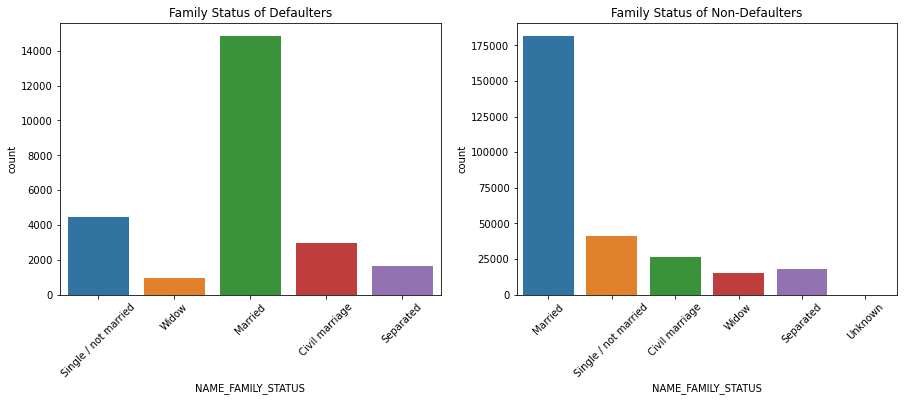

In [168]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = target_default)
plt.title("Family Status of Defaulters")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = target_nondefault)
plt.title("Family Status of Non-Defaulters")
plt.xticks(rotation=45)

plt.show()

### 3.8 Category of Income

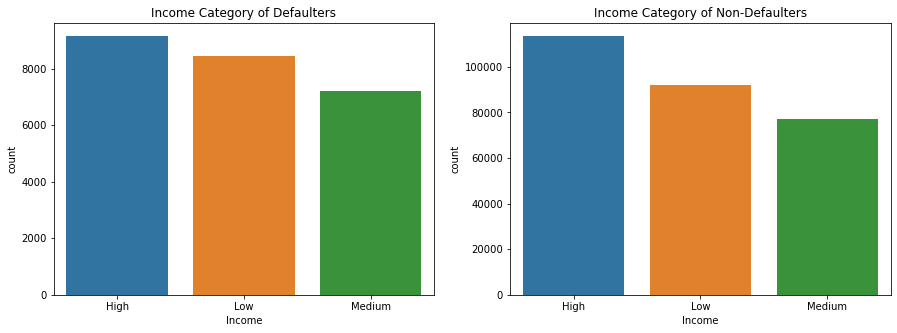

In [169]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Income', data = target_default)
plt.title("Income Category of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'Income', data = target_nondefault)
plt.title("Income Category of Non-Defaulters")
plt.show()

### 3.9 Category of Age

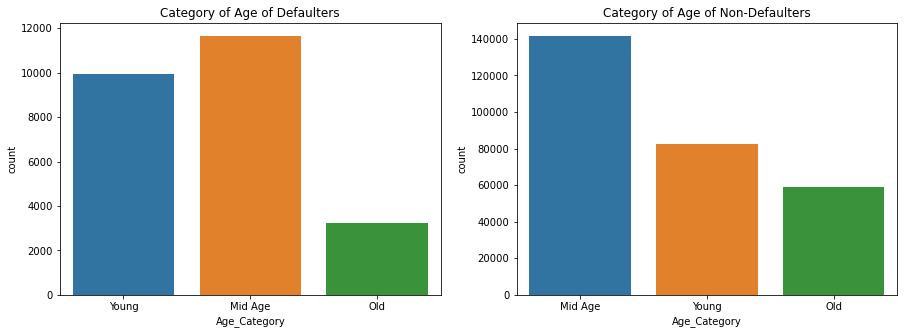

In [170]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Age_Category', data = target_default)
plt.title("Category of Age of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'Age_Category', data = target_nondefault)
plt.title("Category of Age of Non-Defaulters")
plt.show()

### 3.10 Credit Category

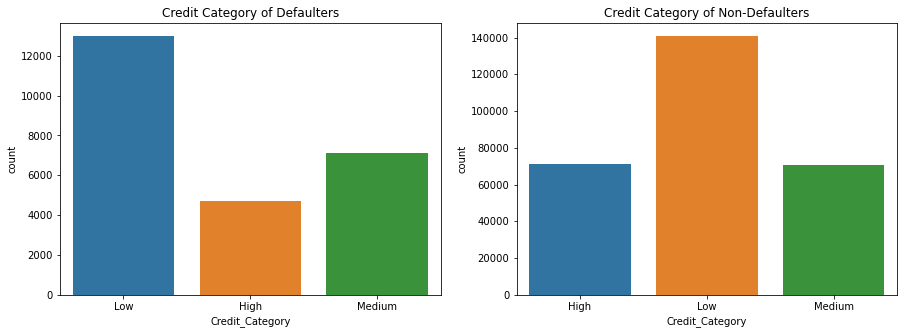

In [171]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'Credit_Category', data = target_default)
plt.title("Credit Category of Defaulters")

plt.subplot(1,2,2)
sns.countplot(x = 'Credit_Category', data = target_nondefault)
plt.title("Credit Category of Non-Defaulters")
plt.show()

### 3.11 Days_Birth

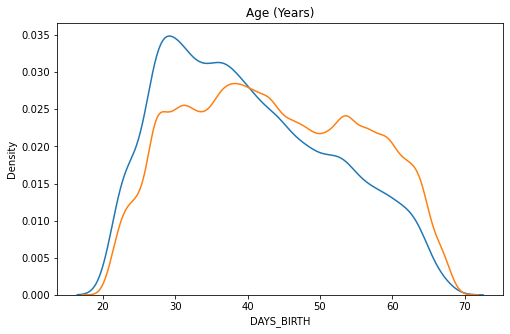

In [175]:
plt.figure(figsize = (8,5))
sns.kdeplot(target_default['DAYS_BIRTH'], label = 'default')
sns.kdeplot(target_nondefault['DAYS_BIRTH'], label = 'non-default')
plt.title('Age (Years)')
plt.show()

### 3.12  Graph for AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

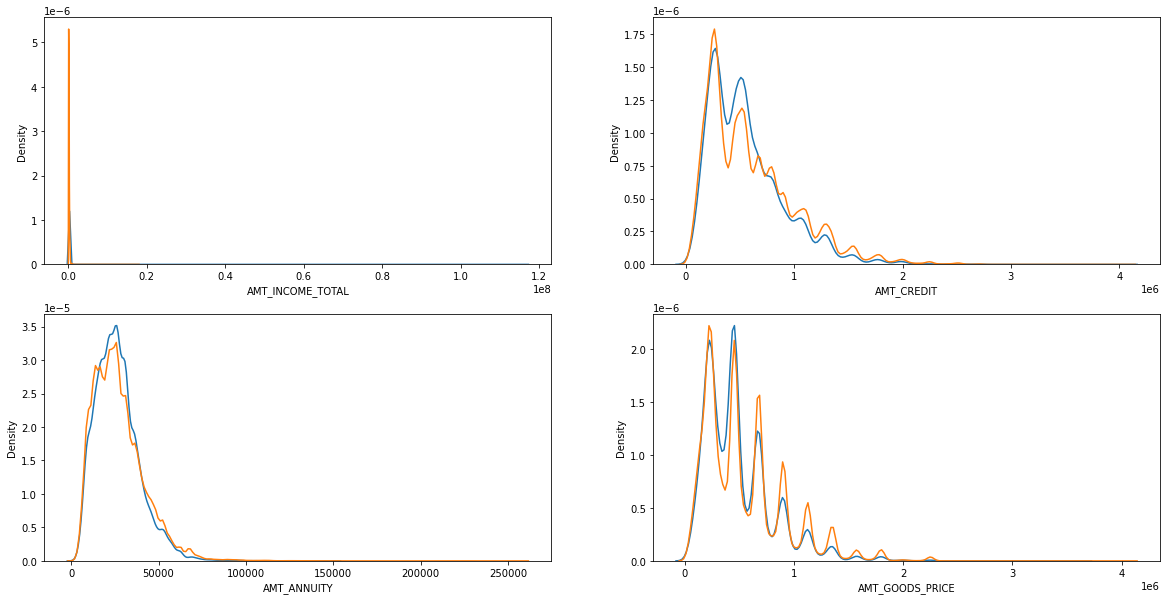

In [176]:
plt.figure(figsize = (20,10))

for i, col in enumerate(columns):
    ax = plt.subplot(2,2,i+1)
    sns.kdeplot(target_default[col], label = 'default')
    sns.kdeplot(target_nondefault[col], label = 'default')
plt.show()

## Loading Previous Application Data

In [178]:
#reading the Previous Application dataset and check the first five rows
df_prev = pd.read_csv("previous_application.csv")
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
#Check the shape of the dataframe
df_prev.shape

(1670214, 37)

## Data Cleaning

### 1. Treatment of Errors in Data

In [180]:
(df_prev.values == 'XNA').sum()

5072473

In [181]:
(df_prev.values == 'XAP').sum()

2275754

In [182]:
#Replacing XNA and XAP with NaN
df_prev = df_prev.replace('XNA', np.NaN)
df_prev = df_prev.replace('XAP', np.NaN)

In [186]:
#imputing Absolute value in DAYS columns
col = [c for c in df_prev if c.startswith('DAYS')]
df_prev[col] = abs(df_prev[col])

### 2. Finding Null Values 

In [187]:
#check the percentage of missing values in each column
df_prev_null = round((df_prev.isnull().sum()*100)/len(df_prev),2).sort_values(ascending = False)
df_prev_null

RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
CODE_REJECT_REASON             81.33
NAME_PRODUCT_TYPE              63.68
NAME_GOODS_CATEGORY            56.93
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_SELLER_INDUSTRY           51.23
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
NAME_PAYMENT_TYPE              37.56
NAME_YIELD_GROUP               30.97
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
NAME_PORTFOLIO                 22.29
NAME_CLIENT_TYPE                0.12
NAME_CONTRACT_TYPE              0.02
PRODUCT_COMBINATION             0.02
DAYS_DECISION                   0.00
AMT_APPLICATION                 0.00
A

### 3.Finding Outliers

In [189]:
round(df_prev[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),3)


,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1297979.000,1284699.000,1297984.000
mean,15955.121,227847.279,16.054
std,14782.137,315396.558,14.567
min,0.000,0.000,0.000
5%,2726.595,22882.500,0.000
25%,6321.780,50841.000,6.000
50%,11250.000,112320.000,12.000
75%,20658.420,234000.000,24.000
90%,34703.820,585000.000,36.000
95%,45336.780,900000.000,48.000


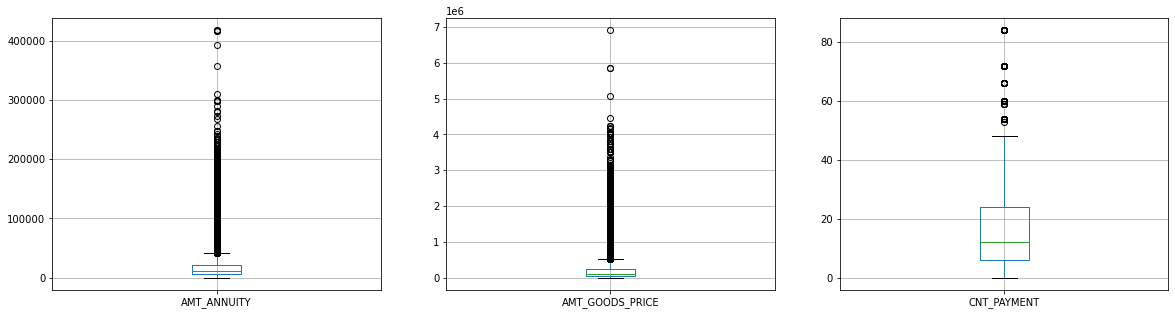

In [190]:
col = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,5))
for i, col in enumerate(col):
    plt.subplot(1,3, i+1)
    df_prev.boxplot(column = col)
plt.show()

### Exploratory Data Analysis of Previous Application Data

### 1. Univariate Analysis on Previous Application data

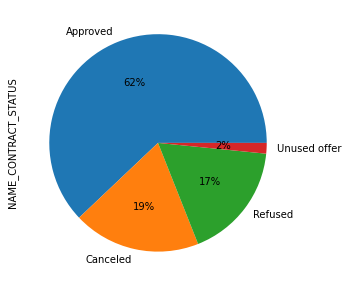

In [195]:
#Contract Status of Previous Application
plt.figure(figsize = (10,5))
C_status = df_prev["NAME_CONTRACT_STATUS"].value_counts()
C_status.plot.pie(autopct = '%1.0f%%')
plt.show()

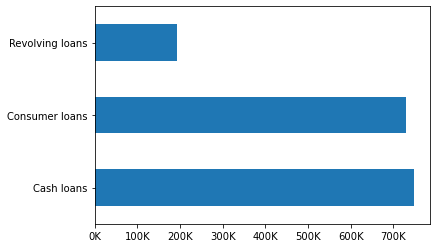

In [196]:
#Name of Contract Type in Previous Application
C_Name = df_prev["NAME_CONTRACT_TYPE"].value_counts()
C_Name.plot.barh()

ticks = np.arange(0, 800000, 100000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.xticks(ticks, labels)

plt.show()

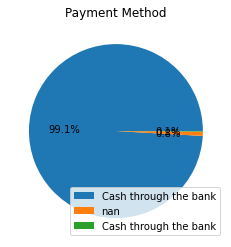

In [197]:
# Payment methods
df_prev['NAME_PAYMENT_TYPE'].value_counts().plot.pie(autopct = '%1.1f%%', title = "Payment Method",labels = ['','',''], ylabel = '',radius = 1)
plt.legend(df_prev['NAME_PAYMENT_TYPE'], loc = 4)
plt.show()


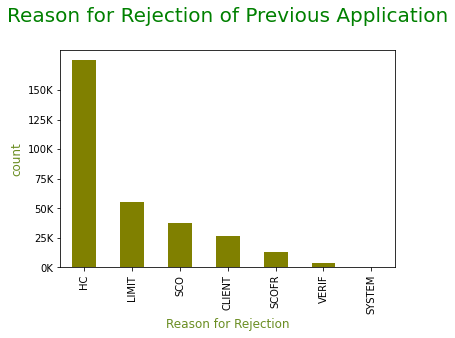

In [198]:
# Reason for Rejection of Previous Application
df_prev.CODE_REJECT_REASON.value_counts().plot.bar(width= 0.5, align='center', color = "olive")
plt.title("Reason for Rejection of Previous Application\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.xlabel("Reason for Rejection", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'olivedrab'})
plt.ylabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'olivedrab'})

ticks = np.arange(0, 175000, 25000)
labels = ["{}K".format(i//1000) for i in ticks]
plt.yticks(ticks, labels)
plt.show()

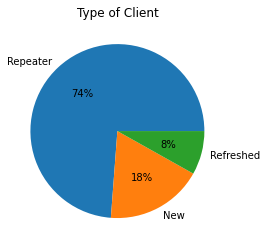

In [202]:
# Type of Client(old or new Client)
C_status = df_prev["NAME_CLIENT_TYPE"].value_counts()
C_status.plot.pie(autopct = '%1.0f%%', ylabel = '', title = "Type of Client")
plt.show()

plt.show()

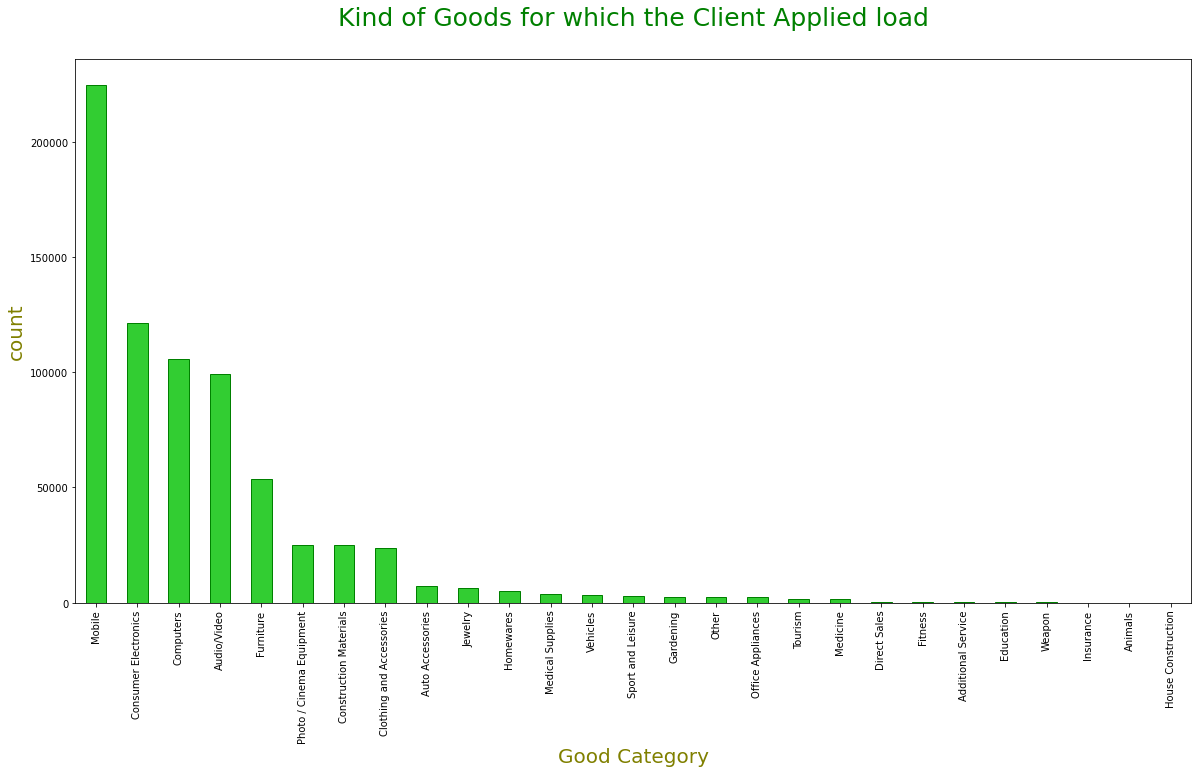

In [203]:
#Category of goods for which the client applied loan
plt.figure(figsize=(20,10))
df_prev.NAME_GOODS_CATEGORY.value_counts().plot.bar(color = 'limegreen', edgecolor='green')

plt.title("Kind of Goods for which the Client Applied load\n", fontdict={'fontsize': 25, 'fontweight' : 10, 'color' : 'Green'})

plt.xlabel("Good Category", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'olive'})
plt.ylabel("count", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'olive'})


plt.show()

### Bivariate Analysis on Previous Application data

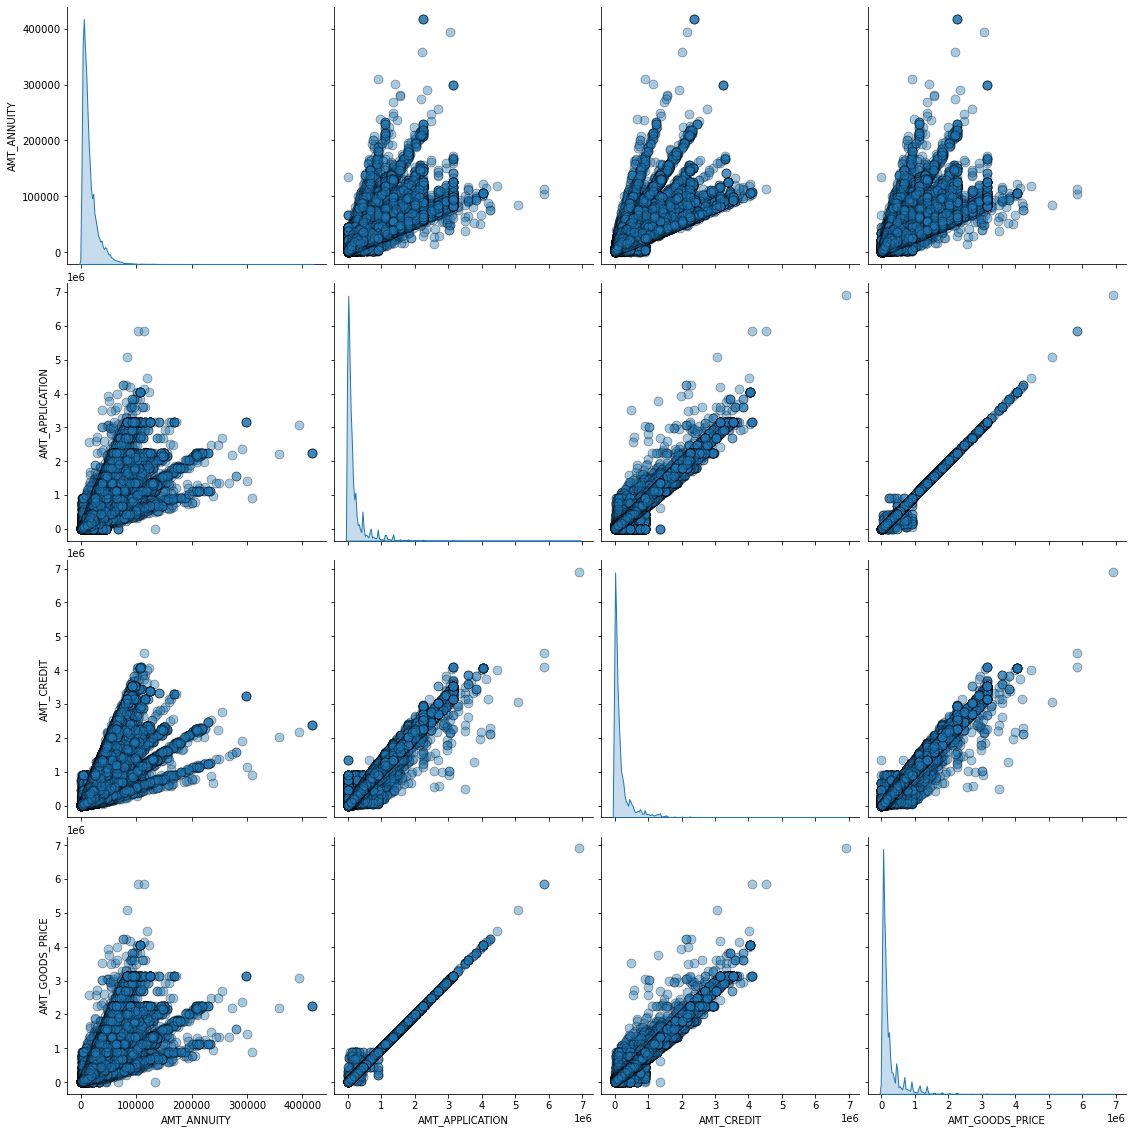

In [204]:
#using pairplot to perform bivariate analysis on numerical data
sns.pairplot(df_prev[['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

## Merging the Application Data with Previous Application Data

In [216]:
df_merged = pd.merge(df_prev, df_new, on = 'SK_ID_CURR', how= 'inner', suffixes='_x')

In [211]:
df_merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_,AMT_ANNUITY_,AMT_APPLICATION,AMT_CREDIT_,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPEx,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDITx,AMT_ANNUITYx,AMT_GOODS_PRICEx,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Income,Age_Category,Credit_Category
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,NaN,Approved,73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,0.046220,39,7392,8447.0,4120,Laborers,TUESDAY,17,0,1,1,0,0,0,Military,0.683797,NaN,0.0,0.0,0.0,0.0,0.0,0.0,High,Mid Age,Medium
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,NaN,Refused,472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,NaN,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,0.046220,39,7392,8447.0,4120,Laborers,TUESDAY,17,0,1,1,0,0,0,Military,0.683797,NaN,0.0,0.0,0.0,0.0,0.0,0.0,High,Mid Age,Medium
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,NaN,Approved,548,Cash through the bank,NaN,NaN,New,Furniture,POS,NaN,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,512.0,182.0,392.0,387.0,0.0,0,Cash loans,F,N,Y,1,225000.0,533668.5,25803.0,477000.0,State servant,Incomplete higher,Married,House / apartment,0.046220,39,7392,8447.0,4120,Laborers,TUESDAY,17,0,1,1,0,0,0,Military,0.683797,NaN,0.0,0.0,0.0,0.0,0.0,0.0,High,Mid Age,Medium
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,58,1255,5455.0,4263,Private service staff,SUNDAY,10,0,0,0,0,0,0,Self-employed,0.663524,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Low,Old,Low
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,NaN,Approved,515,NaN,NaN,NaN,Repeater,NaN,Cash,x-sell,AP+ (Cash loan),6,NaN,36.0,low_normal,Cash X-Sell: low,365243.0,485.0,565.0,155.0,147.0,1.0,0,Revolving loans,F,N,N,0,90000.0,135000.0,6750.0,135000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,58,1255,5455.0,4263,Private service staff,SUNDAY,

In [219]:
df_merged = df_merged.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [213]:
df_merged.shape

(1413701, 77)

## Bivariate Analysis on Merged Data

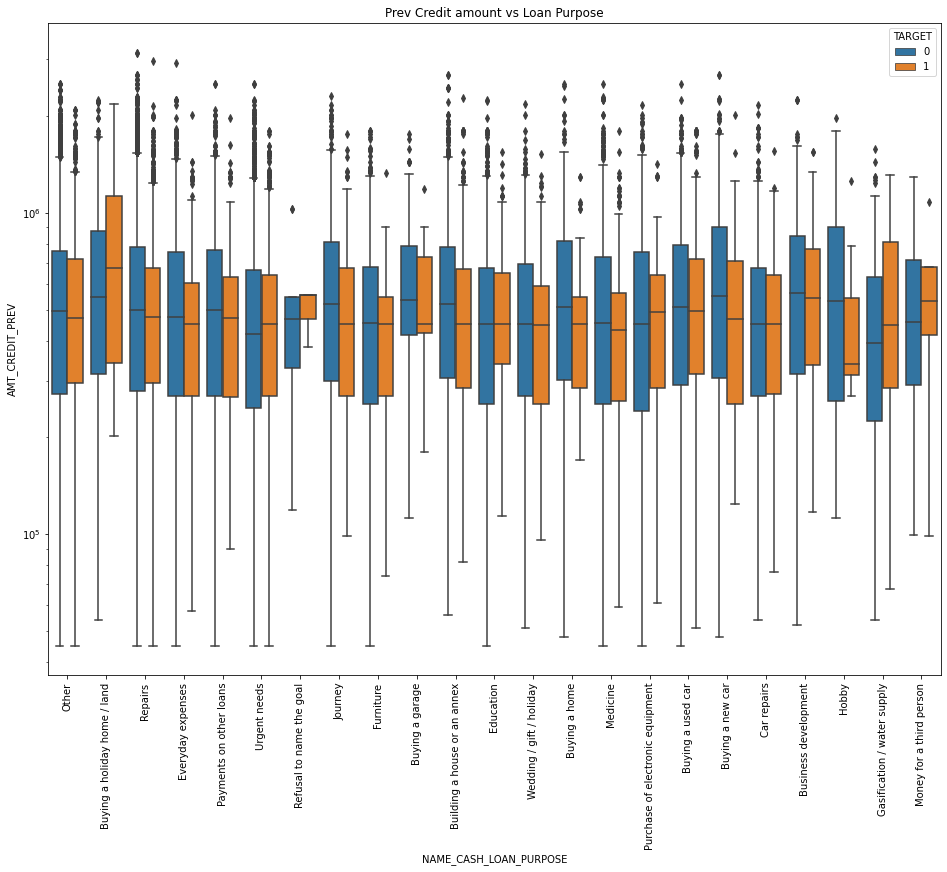

In [224]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =df_merged, x='NAME_CASH_LOAN_PURPOSE',hue='TARGET',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

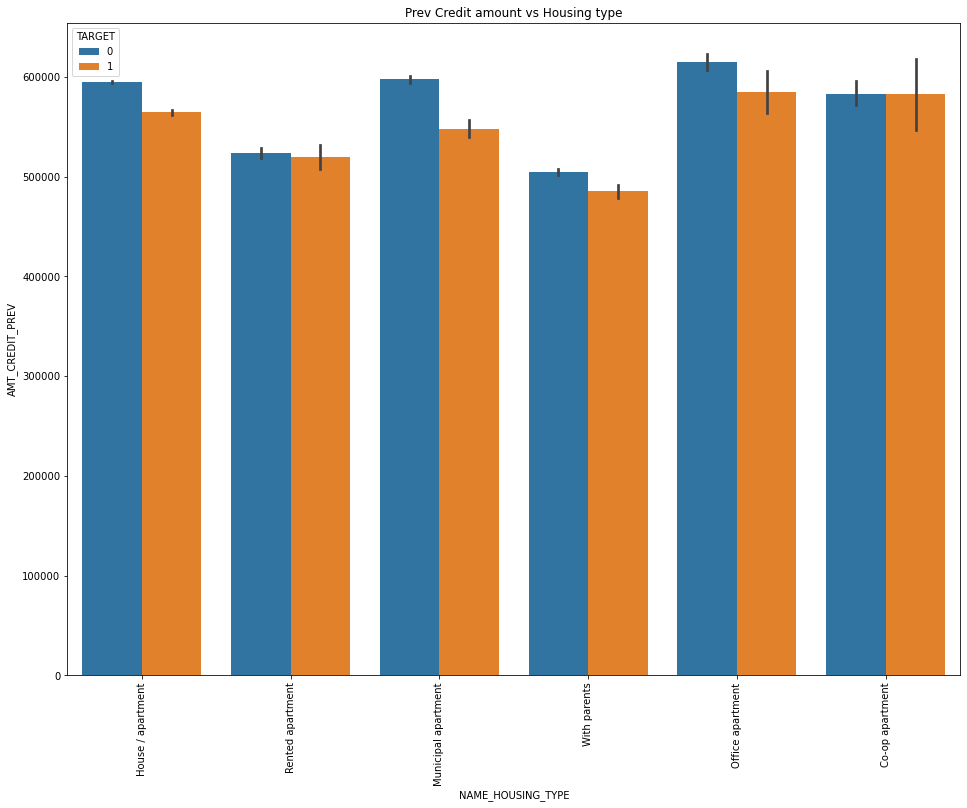

In [222]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df_merged, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()
